In [ ]:
import tensorflow as tf
import scipy.io
import numpy as np
from PIL import Image
from numpy import asarray

In [ ]:
import PIL

In [ ]:
# img = Image.open('/content/object-recognition-using-python.jpg')
# img = tf.constant(asarray(img))
# img.shape

In [ ]:
# import deeplake
# ds = deeplake.load('hub://activeloop/nabirds-dataset-train')

In [ ]:
# !pip install deeplake

In [ ]:
# ds.visualize()

In [ ]:
# valid_ds=deeplake.load('hub://activeloop/nabirds-dataset-val')

In [ ]:
# ds.shape

Got the data set from :
http://www.vision.caltech.edu/datasets/

In [ ]:
import zipfile

In [ ]:
import shutil
shutil.unpack_archive("faces.tar", "/content/faces")


In [ ]:
# mat = scipy.io.loadmat('/content/faces/ImageData.mat')

In [ ]:
# labels=tf.constant(mat['SubDir_Data'])

In [ ]:
# labels[:,0]

In [ ]:
import torch
import cv2
import torchvision.transforms as transforms
  
# # Read the image
# image = cv2.imread('/content/faces/image_0001.jpg')
  
# # Convert BGR image to RGB image
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
# # Define a transform to convert
# # the image to torch tensor

# transform = transforms.Compose([
#     transforms.ToTensor()
# ])  
# # Convert the image to Torch tensor
# tensor = transform(image)
  
# # print the converted image tensor
# print(tensor.shape)

In [ ]:
# tensor

In [ ]:

# torch.save(labels, 'labels.pt')

In [ ]:
labels=torch.load('/content/labels.pt')

In [ ]:
def cp(num):
    a=str(num)
    while(len(a)!=4):
        a='0'+a
    return a    

In [ ]:
# data  = tf.Variable(tf.zeros(shape=(200,3,592,896)))

In [ ]:

l=[]
for i in range(450):
    path='/content/faces/image_'+cp(i+1)+'.jpg'
    image=cv2.imread(path)
    l.append(image)
data=np.array(l)

In [ ]:
# img = Image.open('/content/faces/image_0002.jpg')
# img=tf.constant(asarray(img))
# img.shape

In [ ]:
# img1 = Image.open('/content/faces/image_0001.jpg')
# img1=tf.constant(asarray(img))
# img1.shape

In [ ]:
# new_tensor=tf.constant(img,shape=(1,592,896,3))

In [ ]:
# tf.cast(new_tensor,tf.float16)

In [ ]:

# data=data/255.

In [ ]:
# torch.save(data, 'datanorm.pt')

In [ ]:
import torch
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T

# !wget 'https://images.unsplash.com/photo-1553284965-83fd3e82fa5a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8NHx8fGVufDB8fHx8&w=1000&q=80'  -O white_horse.jpg

# white_torch = torchvision.io.read_image('white_horse.jpg')



In [ ]:
import numpy

In [ ]:
# k=torch.from_numpy(data[0].numpy())

In [ ]:
# n=torch.from_numpy(data.numpy())

In [ ]:
data.shape

(450, 592, 896, 3)

In [ ]:
type(data)

numpy.ndarray

In [ ]:
# cv2_imshow(data[199])

In [ ]:
labels[:,0]

<tf.Tensor: shape=(8,), dtype=float64, numpy=
array([433.00254669, 526.89547255, 435.0688738 ,  41.30860215,
       780.14550085,  37.17594793, 784.27815507, 533.09445388])>

In [ ]:
type(labels)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
# function for plotting a box with coordinates x2,y2 and x4,y4 
import cv2
from google.colab.patches import cv2_imshow
def draw_rect(img,points):
    k=img.copy()
    box_img=cv2.rectangle(k, (int(points[2]), int(points[3])), (int(points[6]), int(points[7])), (255,0,0), 2)
    cv2_imshow(box_img)


In [77]:
def draw_rect_new(img,points):
    k=img.copy()
    box_img=cv2.rectangle(k, (int(points[4]), int(points[5])), (int(points[0]), int(points[1])), (255,0,0), 2)
    cv2_imshow(box_img)

In [ ]:
def draw_lines(img,points):
    k=img.copy()
    k=cv2.line(k,(int(points[2]), int(points[3])),(int(points[0]), int(points[1])),(255,0,0), 2)
    k=cv2.line(k,(int(points[6]), int(points[7])),(int(points[0]), int(points[1])),(255,0,0), 2)
    k=cv2.line(k,(int(points[6]), int(points[7])),(int(points[4]), int(points[5])),(255,0,0), 2)
    k=cv2.line(k,(int(points[2]), int(points[3])),(int(points[4]), int(points[5])),(255,0,0), 2)
    cv2_imshow(k)

In [ ]:
# a=cv2.imread('/content/faces/image_0001.jpg')

In [ ]:
# a.shape

In [ ]:
# draw_rect(data[199],labels[:,199].numpy())

In [ ]:
# cv2_imshow(data[199])

In [ ]:
x_train = data[:400]
y_train=labels[:,:400]
x_test=data[400:]
y_test=labels[:,400:]

In [ ]:
y_train.shape,y_test.shape,labels.shape

(TensorShape([8, 400]), TensorShape([8, 50]), TensorShape([8, 450]))

In [ ]:
y_train=y_train.numpy()
y_test=y_test.numpy()

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
data[0].shape

(592, 896, 3)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import Dropout

In [ ]:
inputs = tf.keras.layers.Input(shape=x_train[0].shape)
x=Conv2D(64,1,activation="relu")(inputs)
x=Conv2D(64,1,activation="relu")(x)
x=MaxPooling2D(2)(x)
x=Conv2D(32,1,activation="relu")(x)
x=MaxPooling2D(2)(x)
x=Conv2D(32,1,activation="relu")(x)
x=MaxPooling2D(2)(x)
x=Conv2D(16,1,activation="relu")(x)
x=MaxPooling2D(2)(x)
# x=Conv2D(16,kernel_size=(2,1),activation="relu")(x)
# x=MaxPooling2D(2)(x)
# x=Conv2D(8,1,activation="relu")(x)
# x=MaxPooling2D(2)(x)
x=Conv2D(8,kernel_size=(2,1),activation="relu")(x)
# x=MaxPooling2D(2)(x)
x=Flatten()(x)
x=Dense(128)(x)
x=Dense(32)(x)
output=Dense(8,activation='linear')(x)



model=keras.Model(inputs,output,name='first_model')


In [ ]:
input=tf.keras.layers.Input(shape=x_train[0].shape)
x=Flatten()(input)
x=Dense(256,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(32,activation='relu')(x)
x=Dropout(0.2)(x)
outputs=Dense(8,activation='linear')(x)

model1=keras.Model(input,outputs,name='second_model')

In [ ]:
inputss = tf.keras.layers.Input(shape=x_train[0].shape)
x=Conv2D(64,1,activation="relu")(inputss)
x=Conv2D(64,1,activation="relu")(x)
x=BatchNormalization()(x)
x=MaxPooling2D(2)(x)
x=Conv2D(32,1,activation="relu")(x)
x=MaxPooling2D(2)(x)
x=Conv2D(32,1,activation="relu")(x)
x=BatchNormalization()(x)
x=MaxPooling2D(2)(x)
x=Conv2D(16,1,activation="relu")(x)
x=MaxPooling2D(2)(x)
x=Conv2D(16,kernel_size=(2,1),activation="relu")(x)
x=MaxPooling2D(2)(x)
x=Conv2D(8,1,activation="relu")(x)
x=MaxPooling2D(2)(x)
# x=Conv2D(8,kernel_size=(2,1),activation="relu")(x)
# x=MaxPooling2D(2)(x)
x=Flatten()(x)
x=Dense(64)(x)
x=Dense(32)(x)
outputss=Dense(8,activation='linear')(x)



model3=keras.Model(inputss,outputss,name='third_model')

In [ ]:
# model.summary()

In [ ]:
model.compile(loss=keras.losses.MAE,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model1.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model3.compile(loss=keras.losses.MAE,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
tf_x_train=tf.constant(x_train)

In [ ]:
tf_x_train=tf.cast(tf_x_train,dtype=tf.float16)

In [ ]:
tf_x_train=tf_x_train/255.

In [ ]:
tf_x_test=tf.constant(x_test)
tf_x_test=tf.cast(tf_x_test,dtype=tf.float16)
tf_x_test=tf_x_test/255.

In [ ]:
model.fit(tf_x_train,y_train.T,epochs=10,steps_per_epoch=len(x_train),validation_data=(tf_x_test,y_test.T),validation_steps=len(x_test))

Epoch 1/10
400/400 [==============================] - 21s 32ms/step - loss: 77.2274 - accuracy: 0.4025 - val_loss: 52.3941 - val_accuracy: 0.1600
Epoch 2/10
400/400 [==============================] - 13s 32ms/step - loss: 57.4125 - accuracy: 0.3625 - val_loss: 35.6778 - val_accuracy: 0.8000
Epoch 3/10
400/400 [==============================] - 13s 32ms/step - loss: 44.8439 - accuracy: 0.4225 - val_loss: 28.6788 - val_accuracy: 0.8000
Epoch 4/10
400/400 [==============================] - 13s 31ms/step - loss: 35.7156 - accuracy: 0.4825 - val_loss: 23.3191 - val_accuracy: 0.1600
Epoch 5/10
400/400 [==============================] - 12s 31ms/step - loss: 32.5434 - accuracy: 0.4800 - val_loss: 27.5361 - val_accuracy: 0.8000
Epoch 6/10
400/400 [==============================] - 13s 31ms/step - loss: 32.7778 - accuracy: 0.4575 - val_loss: 34.1254 - val_accuracy: 0.1800
Epoch 7/10
400/400 [==============================] - 13s 31ms/step - loss: 28.0641 - accuracy: 0.4850 - val_loss: 21.2733 -

In [ ]:
model1.fit(tf_x_train,y_train.T,epochs=10,steps_per_epoch=len(x_train),validation_data=(tf_x_test,y_test.T),validation_steps=len(x_test))

Epoch 1/10
400/400 [==============================] - 34s 84ms/step - loss: 118884.8125 - accuracy: 0.2800 - val_loss: 15902.6904 - val_accuracy: 0.1600
Epoch 2/10
400/400 [==============================] - 33s 84ms/step - loss: 51669.5195 - accuracy: 0.4075 - val_loss: 36050.2266 - val_accuracy: 0.8000
Epoch 3/10
400/400 [==============================] - 33s 84ms/step - loss: 46856.0312 - accuracy: 0.3550 - val_loss: 15316.7451 - val_accuracy: 0.8000
Epoch 4/10
400/400 [==============================] - 33s 84ms/step - loss: 43133.6016 - accuracy: 0.3725 - val_loss: 17988.9922 - val_accuracy: 0.1600
Epoch 5/10
400/400 [==============================] - 34s 84ms/step - loss: 38978.2344 - accuracy: 0.3950 - val_loss: 24019.6309 - val_accuracy: 0.8000
Epoch 6/10
400/400 [==============================] - 33s 83ms/step - loss: 35337.2539 - accuracy: 0.3825 - val_loss: 11348.6611 - val_accuracy: 0.8000
Epoch 7/10
400/400 [==============================] - 33s 84ms/step - loss: 30704.4277 

In [ ]:
model3.fit(tf_x_train,y_train.T,epochs=15,steps_per_epoch=len(x_train),validation_data=(tf_x_test,y_test.T),validation_steps=len(x_test))

Epoch 1/15
400/400 [==============================] - 16s 39ms/step - loss: 72.5676 - accuracy: 0.3750 - val_loss: 168.9410 - val_accuracy: 0.8000
Epoch 2/15
400/400 [==============================] - 15s 37ms/step - loss: 36.4527 - accuracy: 0.4825 - val_loss: 40.1173 - val_accuracy: 0.6600
Epoch 3/15
400/400 [==============================] - 15s 38ms/step - loss: 33.1505 - accuracy: 0.5250 - val_loss: 38.7404 - val_accuracy: 0.3600
Epoch 4/15
400/400 [==============================] - 15s 38ms/step - loss: 32.6522 - accuracy: 0.4425 - val_loss: 32.3898 - val_accuracy: 0.1800
Epoch 5/15
400/400 [==============================] - 15s 37ms/step - loss: 27.4737 - accuracy: 0.4550 - val_loss: 47.1423 - val_accuracy: 0.8000
Epoch 6/15
400/400 [==============================] - 15s 37ms/step - loss: 27.2977 - accuracy: 0.5375 - val_loss: 45.2549 - val_accuracy: 0.4000
Epoch 7/15
400/400 [==============================] - 15s 37ms/step - loss: 24.2478 - accuracy: 0.5025 - val_loss: 34.9018 

In [ ]:
model.predict(tf.expand_dims(tf_x_test[i],axis=0))[0]

1/1 [==============================] - 0s 18ms/step


array([358.9033  , 548.39856 , 364.72717 ,  35.347332, 719.9796  ,
        35.468327, 677.4808  , 542.829   ], dtype=float32)

In [ ]:
# tf_y_test[0]

(50,)

In [ ]:
y_test[:,34]

array([243.78167588, 588.77857118, 243.78167588,  97.94789046,
       645.81886662,  97.94789046, 645.81886662, 586.31208535])

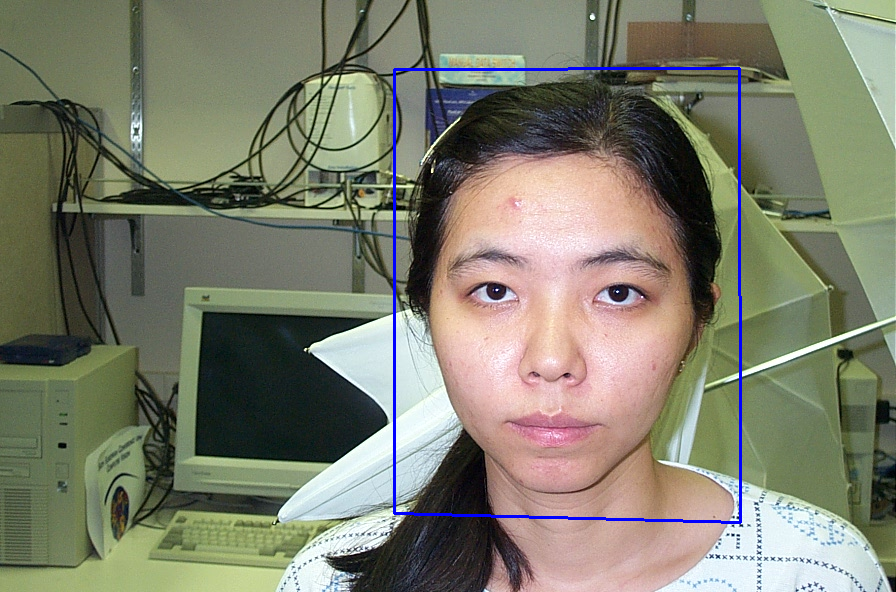

1/1 [==============================] - 0s 24ms/step


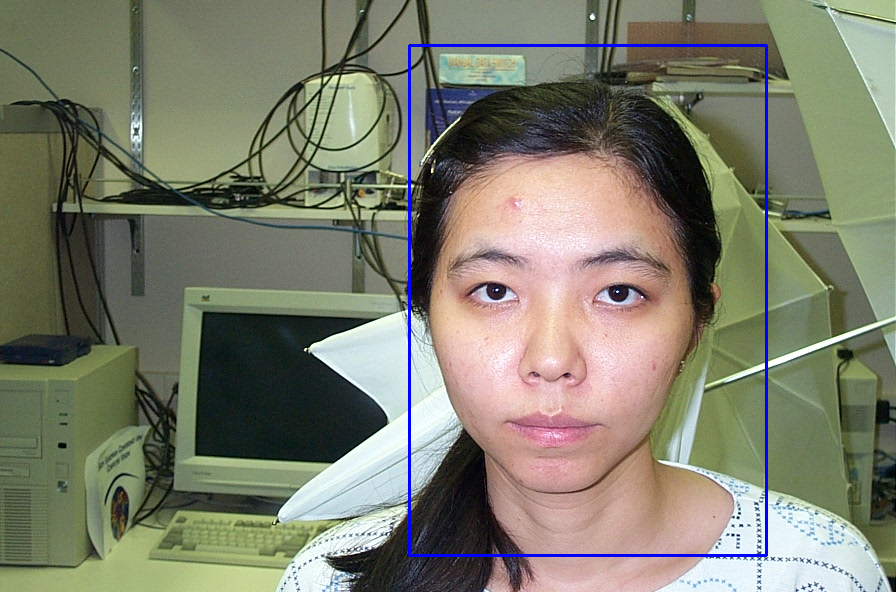

1/1 [==============================] - 0s 27ms/step


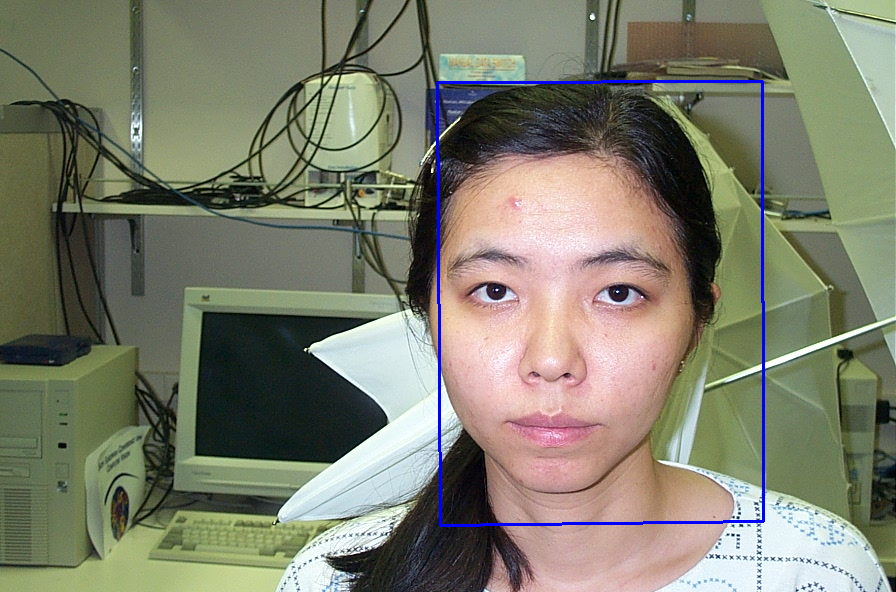

In [80]:
i=22
draw_lines(x_test[i],y_test[:,i])
draw_rect_new(x_test[i],model.predict(tf.expand_dims(tf_x_test[i],axis=0))[0])
# draw_lines(x_test[i],model1.predict(tf.expand_dims(tf_x_test[i],axis=0))[0])
draw_lines(x_test[i],model3.predict(tf.expand_dims(tf_x_test[i],axis=0))[0])

In [67]:
image=cv2.imread('/content/Screenshot 2022-12-22 at 4.11.41 PM.png')
resized_image = cv2.resize(image, (896, 592)) 

1/1 [==============================] - 0s 19ms/step


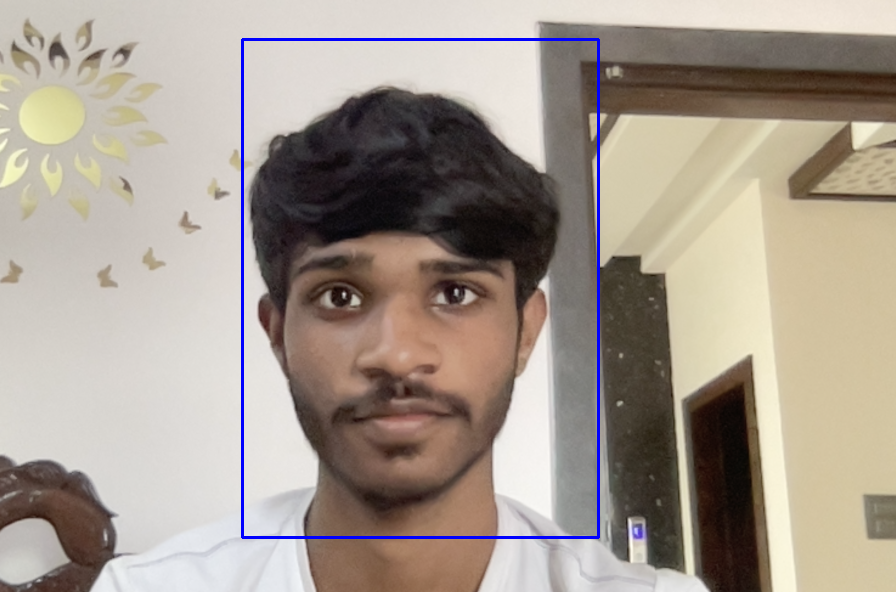

In [78]:
draw_rect_new(resized_image,model.predict(tf.expand_dims(tf.cast(tf.constant(resized_image),dtype=tf.float16)/255.,axis=0))[0])

In [76]:
# draw_lines(resized_image,model3.predict(tf.expand_dims(tf.cast(tf.constant(resized_image),dtype=tf.float16)/255.,axis=0))[0])